Before we get into the project, what is a future?

A future is a financial asset that trading companies can buy and sell and use to generate revenue.

Two types: version where a buyer must buy at a certain price at a specified time
or where a seller must sell at a certain price at a specificed time.

These contracts are purchased at a given price, which is what will be analyzed in this project.

Why purchase futures? 
If the price is high at the time of the contract agreement date, the person that holds the future will make (Revenue - future price).
For the other version, if the price is low at the time of buying, then it is very profitable to purchase the commodity at that price.

Future are mainly used for trading commodities, such as oil, gold, soybeans, etc. However they can be also used for stocks and other financial securities,
such as AAPL stock. Maybe purchasing lots of these stocks can prove useful in the long run and generate lots of revenue!

As for Gold and Crude Oil future prices, we begin by importing all nessacary files and reading the Excel file. Then, convert all time-values to numerical values to compare to each other, and merge them together into one list, and return the lists as two columns. This helps us visualize the data later.

In [2]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# File paths for the uploaded Excel files
oil_file_path = '/Users/AlanWei1/Documents/Ascend Pan-Asian Leaders/Crude Oil Future Prices Dataset.xlsm'
gold_file_path = '/Users/AlanWei1/Documents/Ascend Pan-Asian Leaders/Gold Future Prices Dataset.xlsm'

# Load the excel files into pandas DataFrames
oil_df = pd.read_excel(oil_file_path)
gold_df = pd.read_excel(gold_file_path)

# Preprocessing steps: selecting relevant columns, converting Time to datetime, and merging

# Extract relevant columns: 'Time' and 'Last'
oil_df = oil_df[['Time', 'Last']].rename(columns={'Last': 'Oil_Last_Price'})
gold_df = gold_df[['Time', 'Last']].rename(columns={'Last': 'Gold_Last_Price'})

# Convert 'Time' to datetime format
oil_df['Time'] = pd.to_datetime(oil_df['Time'])
gold_df['Time'] = pd.to_datetime(gold_df['Time'])

# Merge the two datasets on 'Time', keeping only the times where both prices are available
merged_df = pd.merge(oil_df, gold_df, on='Time', how='inner')

# Print out the first few rows of matching dates and values for oil and gold prices
print(merged_df[['Time', 'Oil_Last_Price', 'Gold_Last_Price']].head().to_string(index=False))



      Time  Oil_Last_Price  Gold_Last_Price
2024-10-17           70.07           2691.1
2024-10-16           69.82           2691.3
2024-10-15           70.01           2678.9
2024-10-14           73.24           2665.6
2024-10-11           74.85           2676.3


Below, we want to take a look at what the data looks like, so we scale the two prices to values between 0 and 1, where 0 represents the lowest point in the dataset, and 1 being the highest point. This is helpful since it allows us to see the data in a more simpler way, and rather than two far apart values. This is commonly used in machine learning algorithms to standarize data in order to be trained. Below are the two plotted against each other.

In [3]:
# Normalize the prices by scaling them
merged_df['Scaled_Oil_Price'] = (merged_df['Oil_Last_Price'] - merged_df['Oil_Last_Price'].min()) / (merged_df['Oil_Last_Price'].max() - merged_df['Oil_Last_Price'].min())
merged_df['Scaled_Gold_Price'] = (merged_df['Gold_Last_Price'] - merged_df['Gold_Last_Price'].min()) / (merged_df['Gold_Last_Price'].max() - merged_df['Gold_Last_Price'].min())

# Plot the data using Plotly Express
fig = px.line(merged_df, x='Time', y=['Scaled_Oil_Price', 'Scaled_Gold_Price'], labels={
    'Time': 'Date',
    'value': 'Scaled Price',
    'variable': 'Futures Price'
})

# Update the layout to enhance the graph's visibility
fig.update_layout(
    title="Oil and Gold Futures Prices Over Time (Scaled)",
    xaxis_title="Date",
    yaxis_title="Scaled Price",
    legend_title="Futures",
    width=900,
    height=600
)

# Show the plot
fig.show()


Now the data above does not look that meaningful. So, lets take a look at the volumes of traded amount, which is also included in the dataset. Maybe the amount traded can tell us more about what is underlying in the market and when to purchase these future prices.

In [4]:
correlation_score = merged_df[['Scaled_Oil_Price', 'Scaled_Gold_Price']].corr().iloc[0, 1]

print(f"Correlation Score between Scaled Oil and Scaled Gold Prices: {correlation_score}")

Correlation Score between Scaled Oil and Scaled Gold Prices: -0.06744217961787997


Lol looks like they are not very correlated. A score of -1 is negative correlation, 0 is no correlation, and 1 is perfect correlation. Anything less than absolute value of 0.5 is not very significant. Unlucky. Lets try another statistic, maybe it can provide us some more insight in predicting. 

In [5]:
# File paths for the uploaded Excel files
oil_file_path = '/Users/AlanWei1/Documents/Ascend Pan-Asian Leaders/Crude Oil Future Prices Dataset.xlsm'
gold_file_path = '/Users/AlanWei1/Documents/Ascend Pan-Asian Leaders/Gold Future Prices Dataset.xlsm'

# Load the excel files into pandas DataFrames
oil_df = pd.read_excel(oil_file_path)
gold_df = pd.read_excel(gold_file_path)

# Extract relevant columns: 'Time' and 'Volume' (which is in Column H)
oil_df = oil_df[['Time', 'Volume']].rename(columns={'Volume': 'Oil_Volume'})
gold_df = gold_df[['Time', 'Volume']].rename(columns={'Volume': 'Gold_Volume'})

# Convert 'Time' to datetime format
oil_df['Time'] = pd.to_datetime(oil_df['Time'])
gold_df['Time'] = pd.to_datetime(gold_df['Time'])

# Merge the two datasets on 'Time', keeping only the times where both volumes are available
merged_vol_df = pd.merge(oil_df, gold_df, on='Time', how='inner')

# Save the merged dataset to a new CSV file (optional)
merged_vol_df.to_csv('Merged_Oil_Gold_Volume.csv', index=False)

# Print the merged dataset in a readable format
print(merged_vol_df.head().to_string(index=False))


      Time  Oil_Volume  Gold_Volume
2024-10-17        7089        16638
2024-10-16      163532       151576
2024-10-15      244857       160564
2024-10-14      174465       123361
2024-10-11      217337       168597


Here we have the volume of futures purchased at each given date. However it is difficult to read, so once again standarize the data to between 0 and 1, and plot to see if there are any visual correlations.

In [6]:
# File paths for the uploaded Excel files
oil_file_path = '/Users/AlanWei1/Documents/Ascend Pan-Asian Leaders/Crude Oil Future Prices Dataset.xlsm'
gold_file_path = '/Users/AlanWei1/Documents/Ascend Pan-Asian Leaders/Gold Future Prices Dataset.xlsm'

# Load the excel files into pandas DataFrames
oil_df = pd.read_excel(oil_file_path)
gold_df = pd.read_excel(gold_file_path)

# Extract relevant columns: 'Time' and 'Volume' (which is in Column H)
oil_df = oil_df[['Time', 'Volume']].rename(columns={'Volume': 'Oil_Volume'})
gold_df = gold_df[['Time', 'Volume']].rename(columns={'Volume': 'Gold_Volume'})

# Convert 'Time' to datetime format
oil_df['Time'] = pd.to_datetime(oil_df['Time'])
gold_df['Time'] = pd.to_datetime(gold_df['Time'])

# Merge the two datasets on 'Time', keeping only the times where both volumes are available
merged_vol_df = pd.merge(oil_df, gold_df, on='Time', how='inner')

# Normalize the volumes by scaling them
merged_vol_df['Scaled_Oil_Volume'] = (merged_vol_df['Oil_Volume'] - merged_vol_df['Oil_Volume'].min()) / (merged_vol_df['Oil_Volume'].max() - merged_vol_df['Oil_Volume'].min())
merged_vol_df['Scaled_Gold_Volume'] = (merged_vol_df['Gold_Volume'] - merged_vol_df['Gold_Volume'].min()) / (merged_vol_df['Gold_Volume'].max() - merged_vol_df['Gold_Volume'].min())

# Plot the data using Plotly Express
fig = px.line(merged_vol_df, x='Time', y=['Scaled_Oil_Volume', 'Scaled_Gold_Volume'], labels={
    'Time': 'Date',
    'value': 'Scaled Volume',
    'variable': 'Futures Volume'
})

# Update the layout for better readability
fig.update_layout(
    title="Oil and Gold Futures Volumes Over Time (Scaled)",
    xaxis_title="Date",
    yaxis_title="Scaled Volume",
    legend_title="Futures",
    width=900,
    height=600
)

# Show the plot
fig.show()


Okay, once again kinda at a loss here visually. Lets see what the correlation test gives us.

In [7]:
correlation = merged_vol_df[['Scaled_Oil_Volume', 'Scaled_Gold_Volume']].corr()

print(f"Correlation between scaled oil and gold volumes:\n{correlation}")


Correlation between scaled oil and gold volumes:
                    Scaled_Oil_Volume  Scaled_Gold_Volume
Scaled_Oil_Volume            1.000000            0.803506
Scaled_Gold_Volume           0.803506            1.000000


This tells us there is is very little correlation between the two since the scores are very close to 0, meaning there is little to no correlation.

Finally, lets take a look at the change in price from the previous day, denoted as a percent change where it is positive if the price increased since the previous day, and negative if it decreased from the previous day.

In [8]:
# File paths for the uploaded Excel files
oil_file_path = '/Users/AlanWei1/Documents/Ascend Pan-Asian Leaders/Crude Oil Future Prices Dataset.xlsm'
gold_file_path = '/Users/AlanWei1/Documents/Ascend Pan-Asian Leaders/Gold Future Prices Dataset.xlsm'

# Load the excel files into pandas DataFrames
oil_df = pd.read_excel(oil_file_path)
gold_df = pd.read_excel(gold_file_path)

# Extract relevant columns: 'Time' and '%Chg' (which is in Column G)
oil_df = oil_df[['Time', '%Chg']].rename(columns={'%Chg': 'Oil_Percent_Change'})
gold_df = gold_df[['Time', '%Chg']].rename(columns={'%Chg': 'Gold_Percent_Change'})

# Convert 'Time' to datetime format
oil_df['Time'] = pd.to_datetime(oil_df['Time'])
gold_df['Time'] = pd.to_datetime(gold_df['Time'])

# Merge the two datasets on 'Time', keeping only the times where both percent changes are available
merged_pct_df = pd.merge(oil_df, gold_df, on='Time', how='inner')

# Display the table of datapoints (oil and gold percent changes)
print(merged_pct_df[['Time', 'Oil_Percent_Change', 'Gold_Percent_Change']].head().to_string(index=False))

# Plot the percent changes for both oil and gold
fig = px.line(merged_pct_df, x='Time', y=['Oil_Percent_Change', 'Gold_Percent_Change'], labels={
    'Time': 'Date',
    'value': 'Percent Change',
    'variable': 'Futures Percent Change'
})

# Update the layout for better readability
fig.update_layout(
    title="Oil and Gold Futures Daily Percent Changes Over Time",
    xaxis_title="Date",
    yaxis_title="Percent Change",
    legend_title="Futures",
    width=900,
    height=600
)

# Show the plot
fig.show()

      Time  Oil_Percent_Change  Gold_Percent_Change
2024-10-17              0.0036              -0.0001
2024-10-16             -0.0027               0.0046
2024-10-15             -0.0441               0.0050
2024-10-14             -0.0215              -0.0040
2024-10-11             -0.0035               0.0140


In [9]:
correlation_matrix_pct_change = merged_pct_df[['Oil_Percent_Change', 'Gold_Percent_Change']].corr()

print(f"Correlation matrix for percent changes:\n{correlation_matrix_pct_change}")


Correlation matrix for percent changes:
                     Oil_Percent_Change  Gold_Percent_Change
Oil_Percent_Change             1.000000             0.164163
Gold_Percent_Change            0.164163             1.000000


There is a bit more correlation in these changes, however it is still not enough to be significant. In order to combat this, lets build a model that can possibly use the correlated data to predict future future gold and crude oil prices. lol.

If simply correlation does not prove significant results we can fit a model to, we can build a machine learning model that sort of takes these datapoints and builds a predictor that can use the current amount of datapoints to predict the following datapoints.

In [11]:
# Assuming merged_pct_df, merged_vol_df, and merged_df already exist from previous steps

# First, merge merged_pct_df with merged_vol_df on 'Time'
merged_pct_vol_df = pd.merge(merged_pct_df, merged_vol_df, on='Time', how='inner')

# Then, merge the result with merged_df on 'Time'
final_merged_df = pd.merge(merged_pct_vol_df, merged_df, on='Time', how='inner')

# Check the columns of the final merged dataset and print only the first few rows
print(final_merged_df.head().to_string(index=False))



      Time  Oil_Percent_Change  Gold_Percent_Change  Oil_Volume  Gold_Volume  Scaled_Oil_Volume  Scaled_Gold_Volume  Oil_Last_Price  Gold_Last_Price  Scaled_Oil_Price  Scaled_Gold_Price
2024-10-17              0.0036              -0.0001        7089        16638           0.000000            0.046635           70.07           2691.1          0.338365           0.993851
2024-10-16             -0.0027               0.0046      163532       151576           0.452221            0.429974           69.82           2691.3          0.322642           0.994175
2024-10-15             -0.0441               0.0050      244857       160564           0.687302            0.455508           70.01           2678.9          0.334591           0.974110
2024-10-14             -0.0215              -0.0040      174465       123361           0.483824            0.349820           73.24           2665.6          0.537736           0.952589
2024-10-11             -0.0035               0.0140      217337       

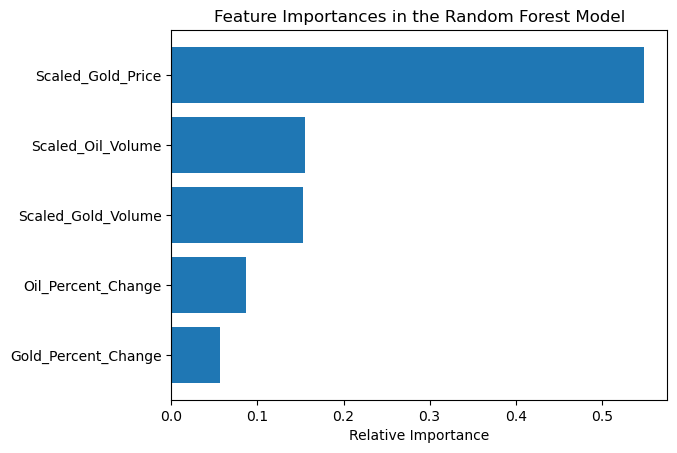

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale


# Assuming the merged_df is already prepared and merged with price, volume, and percent changes
# Define the feature columns (predictors) and the target column (what we're predicting)
FEATURES = ['Scaled_Gold_Price', 'Scaled_Oil_Volume', 'Scaled_Gold_Volume', 'Oil_Percent_Change', 'Gold_Percent_Change']
LABEL = 'Scaled_Oil_Price'  # Predicting oil price

# Standardizing the features for better model performance
final_merged_df[FEATURES] = scale(final_merged_df[FEATURES])

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(final_merged_df[FEATURES], final_merged_df[LABEL], test_size=0.2, random_state=0)

# Define the random forest model
rf_model = RandomForestRegressor(random_state=0)

# Fit the random forest model
rf_model.fit(X_train, y_train)

# Get the feature importances
importances = rf_model.feature_importances_

# Sort the features' indices by their importance scores
indices = np.argsort(importances)

# Plot the feature importances as a horizontal bar graph
plt.title('Feature Importances in the Random Forest Model')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [FEATURES[i] for i in indices])
plt.xlabel('Relative Importance')

# Show the plot
plt.show()


It is really peculiar in that every single feature here is significant, with each being above 0.05, showing that they are relative to the predicting power of the Random Forest Model. In that case, we use all of them to train the model using the 80% training set and 20% testing set method. We can merge all of these features into one main features variable to be tested in the different machine learning models.

In [13]:
# Necessary imports
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeRegressor


# Assuming final_merged_df is already prepared and merged with price, volume, and percent changes
# Define the feature columns (predictors) and the target column (what we're predicting)
FEATURES = ['Scaled_Oil_Volume', 'Scaled_Gold_Volume', 'Oil_Percent_Change', 'Gold_Percent_Change']
LABEL = 'Scaled_Oil_Price'  

final_merged_df[FEATURES] = scale(final_merged_df[FEATURES])

X_train, X_test, y_train, y_test = train_test_split(final_merged_df[FEATURES], final_merged_df[LABEL], test_size=0.2, random_state=0)

base_model = DecisionTreeRegressor(random_state=0)
bagging_model = BaggingRegressor(base_model, n_estimators=100, random_state=0)

bagging_model.fit(X_train, y_train)

y_train_pred = bagging_model.predict(X_train)
y_test_pred = bagging_model.predict(X_test)

train_error = np.mean((y_train_pred - y_train)**2)
test_error = np.mean((y_test_pred - y_test)**2)

print('Bagging Regressor Training Error (MSE) = %.3f' % train_error)
print('Bagging Regressor Testing Error (MSE) = %.3f' % test_error)

train_accuracy = bagging_model.score(X_train, y_train)
test_accuracy = bagging_model.score(X_test, y_test)

print('Bagging Regressor Training Accuracy (R^2) = %.3f' % train_accuracy)
print('Bagging Regressor Testing Accuracy (R^2) = %.3f' % test_accuracy)

Bagging Regressor Training Error (MSE) = 0.003
Bagging Regressor Testing Error (MSE) = 0.020
Bagging Regressor Training Accuracy (R^2) = 0.930
Bagging Regressor Testing Accuracy (R^2) = 0.465


The Bagging Regressor model training accuracy is really high, and with a really low error the testing measurements are very promising and should deliver good results.

Confusion Matrix:
 [[13  3]
 [ 6 19]]
AUC Score = 0.859


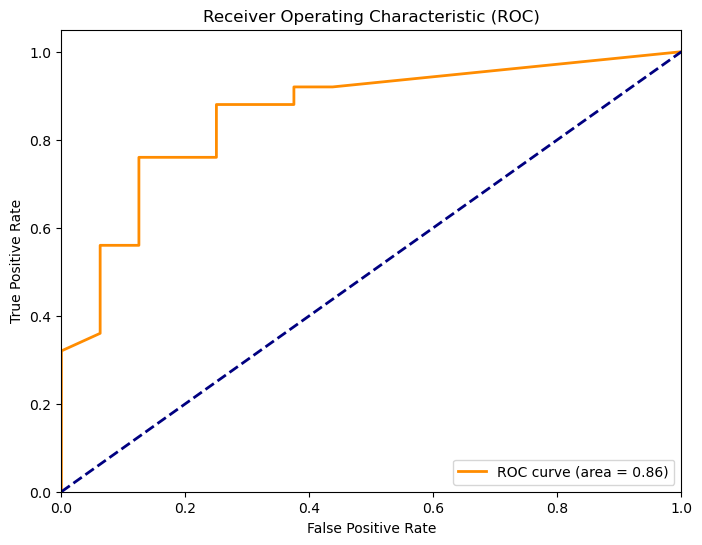

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Redefine the target variable for classification (0 = decrease, 1 = increase)
final_merged_df['Price_Change'] = np.where(final_merged_df[LABEL] > final_merged_df[LABEL].median(), 1, 0)

# Define the new LABEL for classification
LABEL = 'Price_Change'  

# Split the data
X_train, X_test, y_train, y_test = train_test_split(final_merged_df[FEATURES], final_merged_df[LABEL], test_size=0.2, random_state=0)

# Define the base model and bagging classifier
base_model = DecisionTreeClassifier(random_state=0)
bagging_model = BaggingClassifier(base_model, n_estimators=100, random_state=0)

# Train the model
bagging_model.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = bagging_model.predict(X_train)
y_test_pred = bagging_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:\n', conf_matrix)

# AUC Score and ROC Curve
y_test_proba = bagging_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_test_proba)
print('AUC Score = %.3f' % auc_score)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


The ROC curve area is 0.86, which means the model gets the prediction right more than 60% of the time, meaning the Bagging model has significant predicting power. Oftentimes a AUC score above .85 is regarded as really strong, making the model reasonable for using for predicting future crude oil prices.

Let's try another model to see if there are better results. The following model uses classification where an upward movement in price is represented by a 1 and a downward movement by a 0. There are some differences in how the model works.

AdaBoost Regressor Training MSE = 0.197
AdaBoost Regressor Testing MSE = 0.264
AdaBoost Regressor Training R² = 0.204
AdaBoost Regressor Testing R² = -0.072
Confusion Matrix:
 [[17  1]
 [16  7]]
AUC Score = 0.719


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



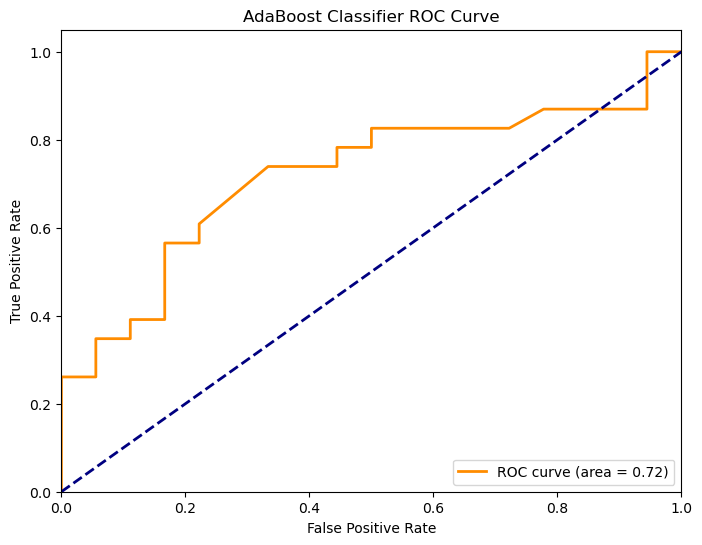

In [21]:
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

# ---- AdaBoost Regressor ----

# Define base estimator for boosting
base_regressor = DecisionTreeRegressor(max_depth=3, random_state=0)

# Initialize AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=0)

# Train AdaBoost Regressor
adaboost_regressor.fit(X_train, y_train)

# Predict on test set
y_test_pred = adaboost_regressor.predict(X_test)
y_train_pred = adaboost_regressor.predict(X_train)

# Compute errors
train_mse = np.mean((y_train_pred - y_train) ** 2)
test_mse = np.mean((y_test_pred - y_test) ** 2)

# Compute R² scores
train_r2 = adaboost_regressor.score(X_train, y_train)
test_r2 = adaboost_regressor.score(X_test, y_test)

print('AdaBoost Regressor Training MSE = %.3f' % train_mse)
print('AdaBoost Regressor Testing MSE = %.3f' % test_mse)
print('AdaBoost Regressor Training R² = %.3f' % train_r2)
print('AdaBoost Regressor Testing R² = %.3f' % test_r2)


# ---- AdaBoost Classifier ----

# Redefine classification target
final_merged_df['Price_Change'] = np.where(final_merged_df[LABEL] > final_merged_df[LABEL].median(), 1, 0)

# Split classification data
X_train, X_test, y_train, y_test = train_test_split(final_merged_df[FEATURES], final_merged_df['Price_Change'], test_size=0.2, random_state=0)

# Define base classifier
base_classifier = DecisionTreeClassifier(max_depth=1, random_state=0)

# Initialize AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)

# Train classifier
adaboost_classifier.fit(X_train, y_train)

# Predictions
y_test_pred = adaboost_classifier.predict(X_test)
y_test_proba = adaboost_classifier.predict_proba(X_test)[:, 1]

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:\n', conf_matrix)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_test_proba)
print('AUC Score = %.3f' % auc_score)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Classifier ROC Curve')
plt.legend(loc='lower right')
plt.show()


With an AUC score of 0.72, the AdaBoost model is less accurate that the Bagging, but still produced significant results.